In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min



In [34]:
np.random.seed(42)


In [35]:
x, _  = make_blobs(n_samples=300,centers=4,random_state=42)
x

array([[ -9.29768866,   6.47367855],
       [ -9.69874112,   6.93896737],
       [ -1.68665271,   7.79344248],
       [ -7.09730839,  -5.78133274],
       [-10.87645229,   6.3154366 ],
       [ -6.02196757,  -7.04004812],
       [  4.81305976,   2.35848706],
       [ -6.46669574,  -7.44383415],
       [ -2.98837186,   8.82862715],
       [  3.44857534,   2.62972329],
       [ -3.11090424,  10.86656431],
       [  4.99689432,   1.28026009],
       [ -2.30033403,   7.054616  ],
       [ -3.92456837,   8.59364081],
       [ -9.48897033,   6.83639753],
       [ -3.21125072,   8.68662398],
       [-10.46587019,   7.37160786],
       [  2.61473625,   2.159624  ],
       [ -2.41212007,   9.98293112],
       [ -1.92234053,  11.20474175],
       [  5.79847442,   1.15248737],
       [ -2.67048333,   9.41833699],
       [ -5.90450746,  -7.02716697],
       [ -8.95065581,   7.10255332],
       [ -2.97261532,   8.54855637],
       [ -8.30852358,   8.76509154],
       [ -9.41509909,   8.07891414],
 

C:\Users\aswan\AppData\Local\Temp\ipykernel_20668\1135715595.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],s=30,cmap='virdis',color = "red")


Text(0.5, 1.0, 'Sample Data')

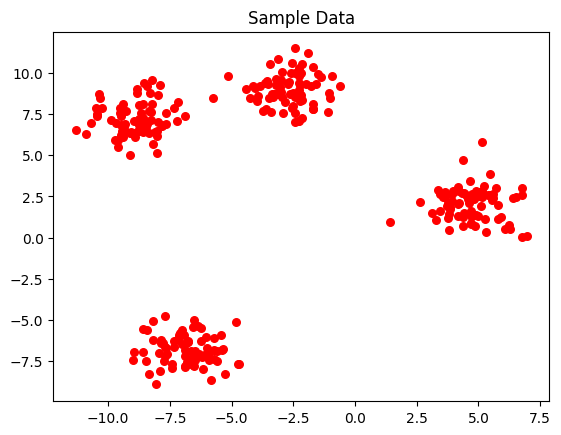

In [36]:
plt.scatter(x[:,0],x[:,1],s=30,cmap='virdis',color = "red")
plt.title("Sample Data")


In [42]:
def kmean_plus_plus(X,n_clusters):
    centroid = [x,[np.random.choice(x.shape[0])]]

    for _ in range(1,n_clusters):
        distance = pairwise_distances_argmin_min(X,centroid)[1]
        probabilities = distance ** 2 / np.sum(distance **2)
        new_centroid = x[np.random.choice(x.shape[0], p = probabilities)]
        centroid.append(new_centroid)
    return np.array(centroid)


In [ ]:
def kmean_and_plots(X,k_values):
    plt.figure(figsize = (len(k_values)*5,5))

    for i,k in enumerate(k_values):
        centroid = kmean_plus_plus(x,k)
        kmeans = KMeans(n_clusters=k,init=centroid,n_init = 1, random_state=42)
        labels = kmeans.fit_predict(X)

        plt.subplot(1,len(k_values),i+1)
        plt.scatter(x[:,0],x[:,1],c=labels,s=30,cmap='viridis')
        plt.scatter(centroid[:,0],centroid[:,1],c='red',marker='X',s=200,label='Centroids')
        plt.title(f"K-means Clustering (K={k})")
    plt.show()
k_values = range(2,8)
kmean_and_plots(x,k_values)